# Analysis

In [39]:
include("main.jl")

┌ Warning: replacing command main in the registry
└ @ Comonicon /Users/zijin/.julia/packages/Comonicon/F3QqZ/src/frontend/utils.jl:35


In [40]:
dim = 1
beta = 2.0
# beta = 0.25
theta = 60.0
eta = 10.0

meta = setup(dim, beta, theta, eta)

Changed to /Users/zijin/projects/swd_simulation/warpx/01_oblique_linear_alfven/dim_1_beta_2.0_theta_60.0_eta_10.0


Dict{String, Any} with 50 entries:
  "diag_field"   => true
  "w_pi"         => 13165.5
  "Lz_norm"      => 128
  "dt"           => 0.0102491
  "Lx_norm"      => 0
  "m_ion_norm"   => 1836.15
  "nz"           => 256
  "Te"           => 496.413
  "ny"           => 8
  "wave_number"  => 2
  "dz_norm"      => 0.5
  "vA_over_c"    => 0.000727373
  "warpx_kwargs" => Dict{String, Any}()
  "Lz"           => 2.9147e6
  "nppc"         => 64
  "dz"           => 11385.5
  "k"            => 4.31138e-6
  "grid_kwargs"  => Dict{String, Any}()
  "m_ion"        => 1.67262e-27
  ⋮              => ⋮

In [41]:
df = load_field(meta);

["Bx", "By", "Bz", "Ex", "Ey", "Ez", "jx", "jy", "jz", "rho", "z", "x", "y", "time", "velocity_th_x", "velocity_th_y", "velocity_th_z", "velocity_th_parp", "pressure_x", "pressure_y", "pressure_z", "pressure_parp", "Bx_1", "By_1", "Bz_1", "Bmag", "pressure_perp", "velocity_th_perp", "anisotropy", "rho_c", "rho_n", "rho_n_norm", "time_norm", "z_norm", "T_parp_norm", "T_perp_norm", "Emag", "jmag"]


In [42]:
if dim == 1
    z = :x
elseif dim== 2
    z = :y
else
    z = :z
end

:x

In [43]:
B_fields = names(df, r"^B(x|y|z|mag)$")
E_field = names(df, r"E")
j_field = names(df, r"j")
rho_field = names(df, r"rho")

pressure_fields = ["pressure_x", "pressure_y", "pressure_z"]
pressure_f_fields = ["pressure_parp", "pressure_perp"]
temp_f_fields = ["T_parp", "T_perp"]

variables = [B_fields; E_field; j_field]

12-element Vector{String}:
 "Bx"
 "By"
 "Bz"
 "Bmag"
 "Ex"
 "Ey"
 "Ez"
 "Emag"
 "jx"
 "jy"
 "jz"
 "jmag"

In [52]:
fig = plot_fields(df, "anisotropy")
fig.figure.colorbar(label="Anisotropy")

ErrorException: type Figure has no field colorbar

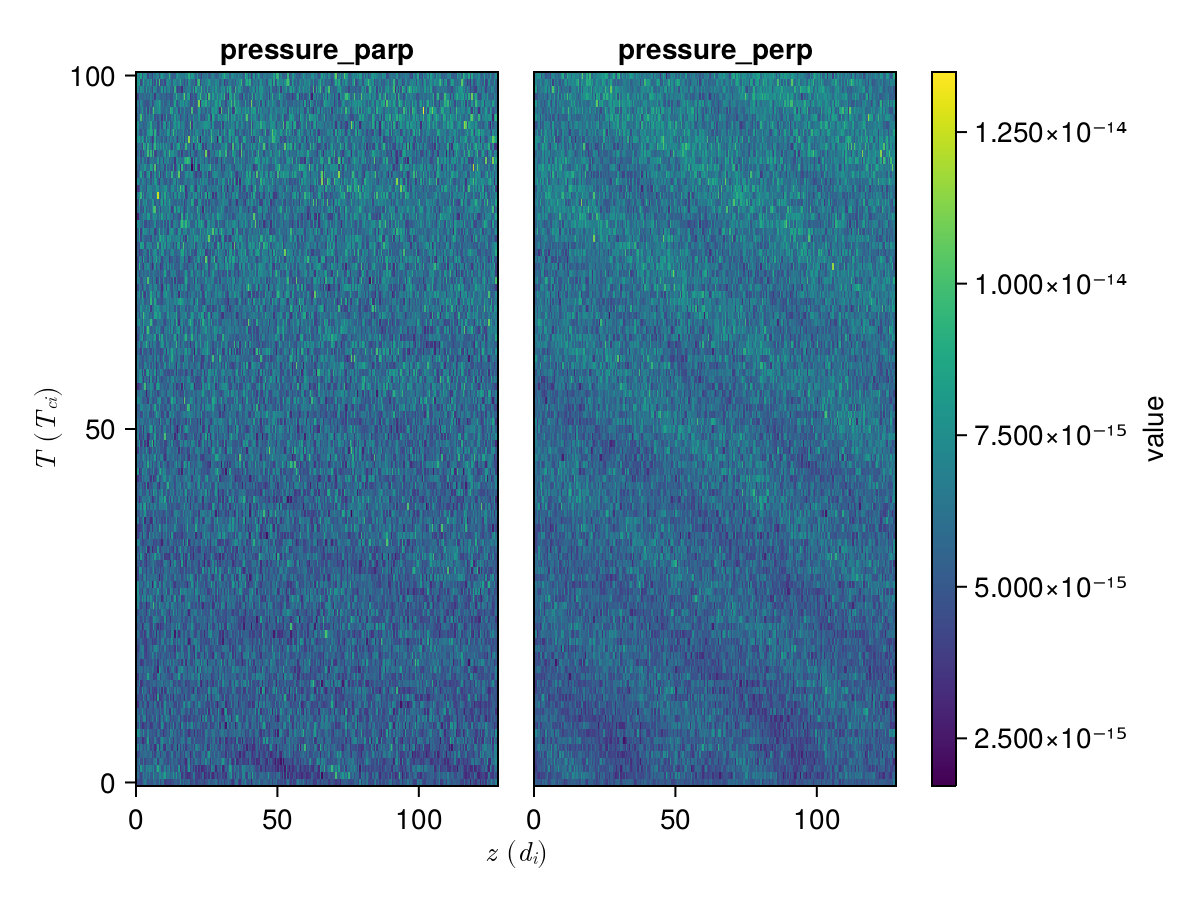

In [46]:
plot_fields(df, pressure_f_fields)
# easy_save("pressure_fields")

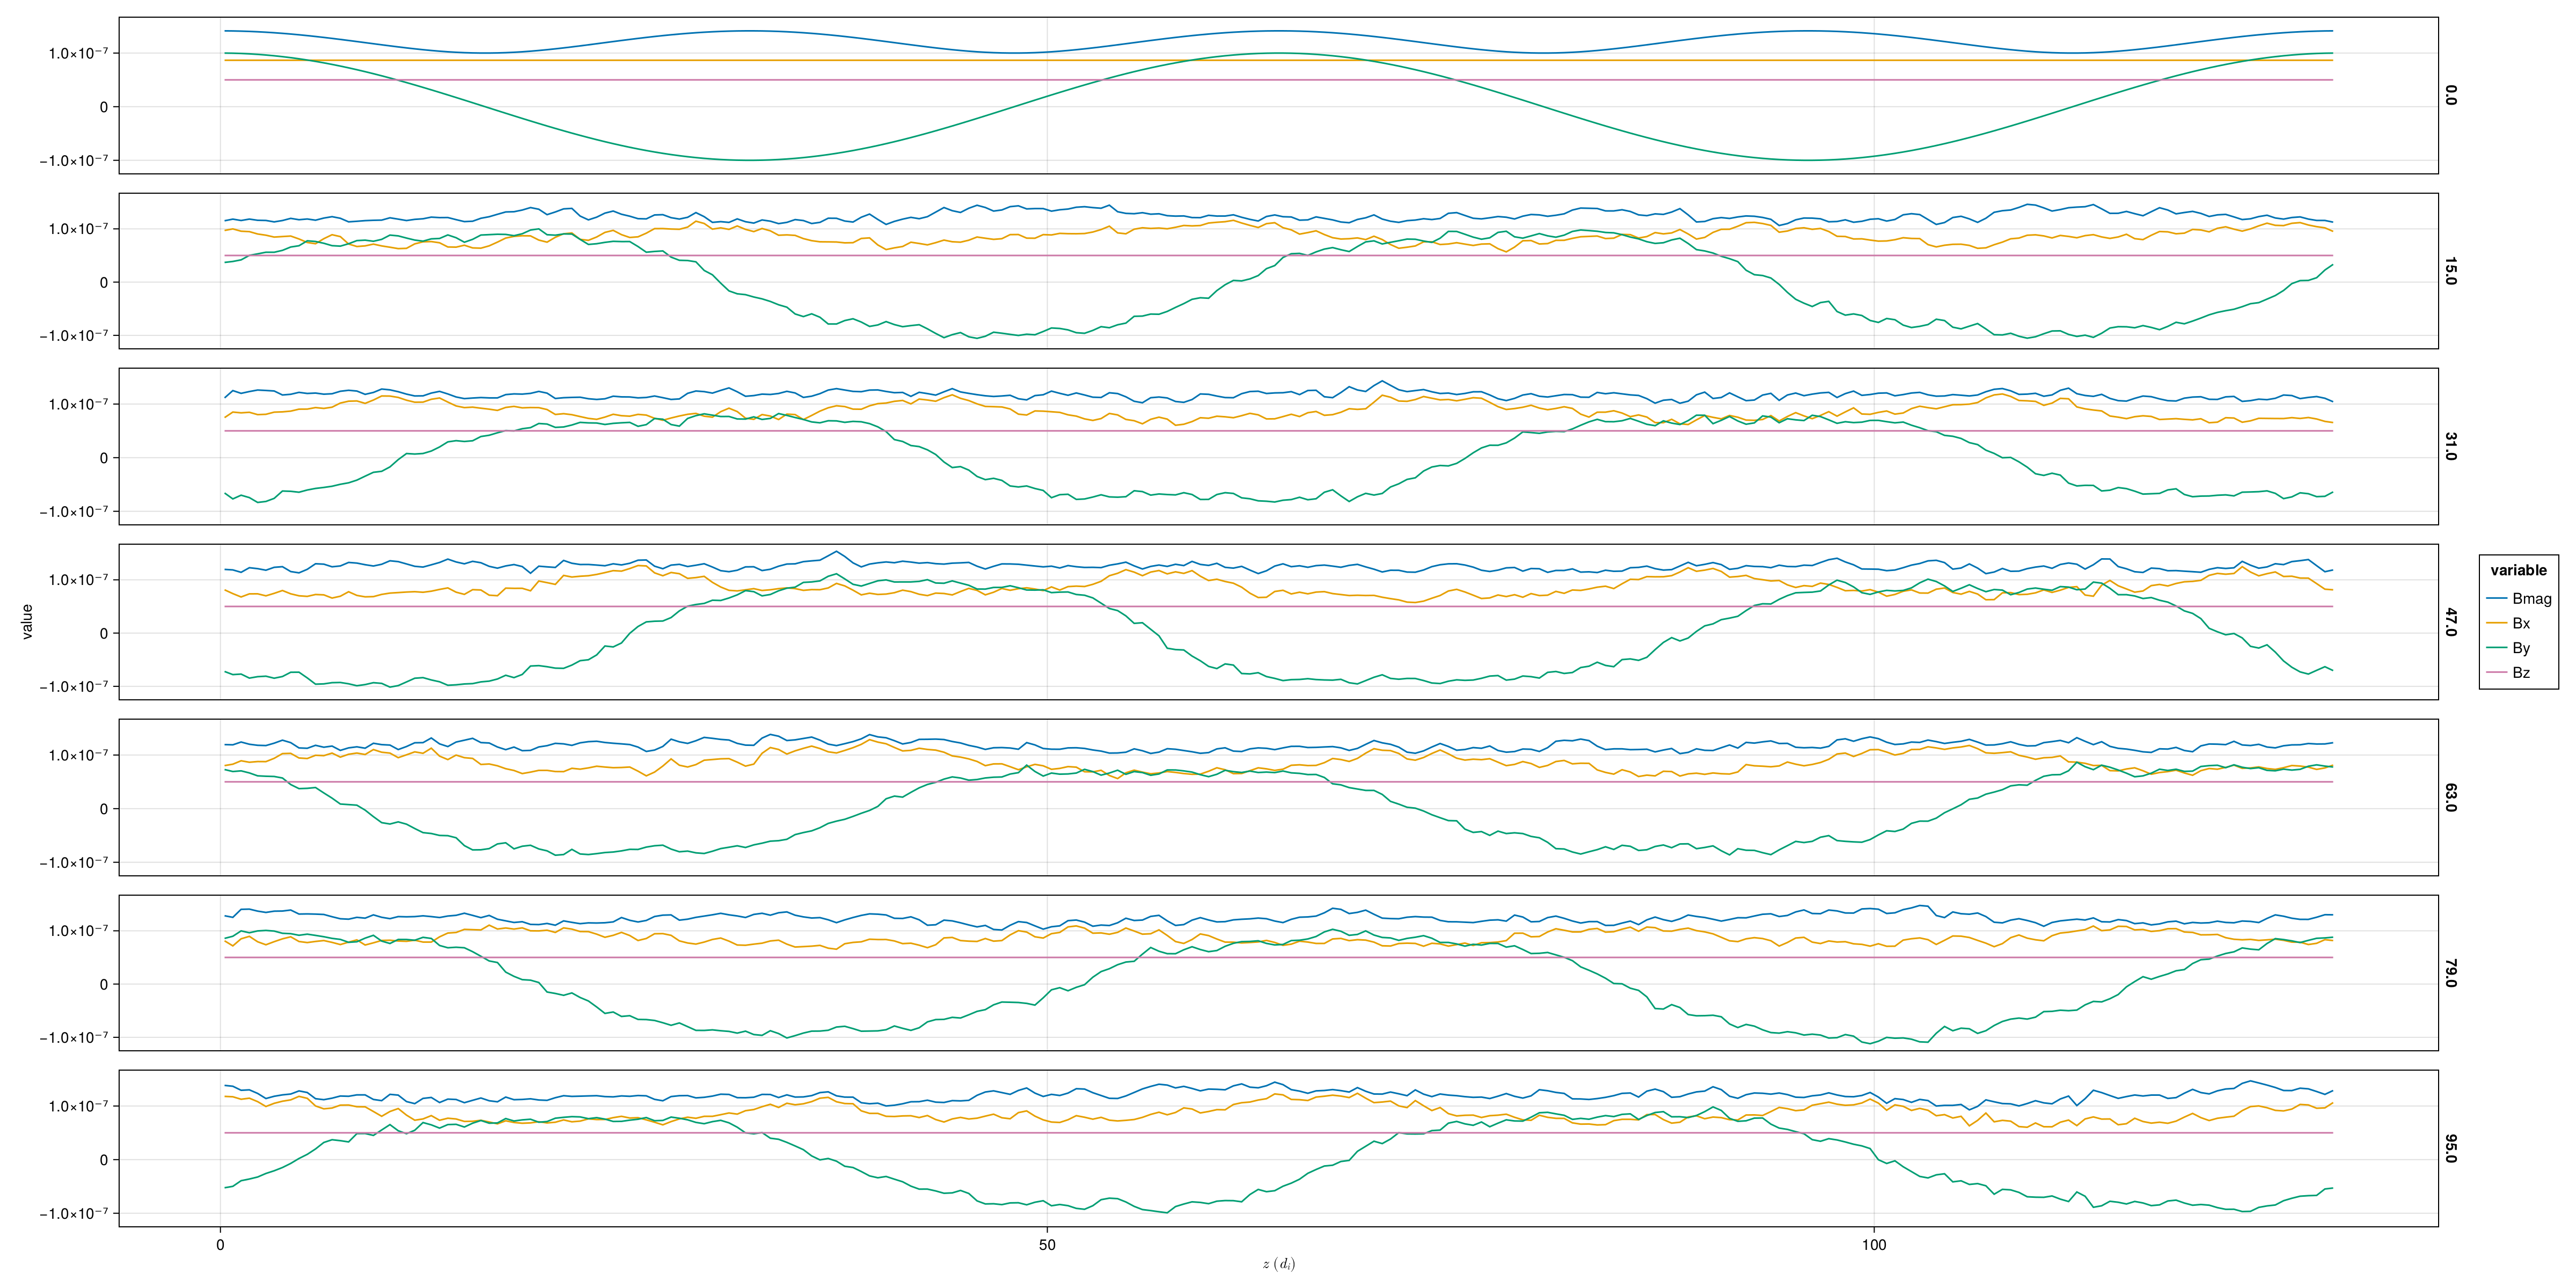

In [12]:
fig_options = (size=(2400, 1200),)
window = (;step=16)
plt = plot_fields_time(df, B_fields; window = window)
draw(plt; figure=fig_options)
# easy_save("B_time");

In [55]:
function plot_field(df, field; ids=ids)
    temp_df = stack(df, field, ids)
    data(temp_df) * mapping(:z_norm => z_norm_lab, :value, color=:variable) * visual(Lines)
end

function plot_field(field; ids=ids, df=df)
    plot_field(df, field; ids=ids)
end

plot_field (generic function with 2 methods)

In [67]:
pressure_cols = names(df, r"pressure")
temp_cols = replace.(pressure_cols, r"pressure" => "T")

# Define a function for the transformation to avoid repetition
calculate_temperature = (p, rho) -> p ./ rho

# Use a loop to transform multiple pressure columns
for (pressure_col, temp_col) in zip(pressure_cols, temp_cols)
    transform!(df, [pressure_col, "rho"] => calculate_temperature => temp_col)
end

In [64]:
gdf = groupby(df, :time_norm)

fields = [B_fields, "rho", ["T_z"], j_field, pressure_f_fields, "anisotropy"]
labels = [L"B", L"\rho", L"T_z", L"j", "Pressure", "anisotropy"]

for (key, subdf) in pairs(gdf)
    fig = Figure(size=(1200, 1000),)
    axs = [Axis(fig[i, 1]) for i in 1:length(fields)]

    plts = map(plot_field $ subdf , fields)
    map(draw!, axs, plts)
    map(hidexdecorations!, axs)

    # add labels
    for (ax, label) in zip(axs, labels)
        ax.ylabel = label
    end

    axs[1].title = "Time: $(key.time_norm)"
    axs[end].xlabel = z_norm_lab

    easy_save("time_$(key.time_norm)", dir="fields")
end

┌ Info: Saved /Users/zijin/projects/swd_simulation/warpx/01_oblique_linear_alfven/dim_1_beta_0.25_theta_60.0_eta_10.0/fields/time_0.0.png
└ @ beforerr /Users/zijin/.julia/dev/beforerr.jl/src/utils/makie.jl:34
┌ Info: Saved /Users/zijin/projects/swd_simulation/warpx/01_oblique_linear_alfven/dim_1_beta_0.25_theta_60.0_eta_10.0/fields/time_1.0000000000000004.png
└ @ beforerr /Users/zijin/.julia/dev/beforerr.jl/src/utils/makie.jl:34
┌ Info: Saved /Users/zijin/projects/swd_simulation/warpx/01_oblique_linear_alfven/dim_1_beta_0.25_theta_60.0_eta_10.0/fields/time_2.000000000000001.png
└ @ beforerr /Users/zijin/.julia/dev/beforerr.jl/src/utils/makie.jl:34
┌ Info: Saved /Users/zijin/projects/swd_simulation/warpx/01_oblique_linear_alfven/dim_1_beta_0.25_theta_60.0_eta_10.0/fields/time_3.0000000000000018.png
└ @ beforerr /Users/zijin/.julia/dev/beforerr.jl/src/utils/makie.jl:34
┌ Info: Saved /Users/zijin/projects/swd_simulation/warpx/01_oblique_linear_alfven/dim_1_beta_0.25_theta_60.0_eta_10.0/fi

In [10]:
vars = [:Bmag, :By, :rho, :p_zz, :T_z]
fig_options = (size=(2400, 700),)
facet = (; linkxaxes = :all, linkyaxes = :rowwise)

temp_df = df |> select_time $ window
plt = plot_fields_time(temp_df, vars)
plt *= mapping(col=:time_norm, row=:variable)
draw(plt; figure=fig_options, facet=facet)
# easy_save("B_time");

ArgumentError: ArgumentError: column name :p_zz not found in the data frame

In [ ]:
plot_fields_time(df, [:Bmag, :rho]; step=8, norm=true)
easy_save("B_rho_time")

In [ ]:
function plot_pressure_evolution(; cols = [:P_xx, :P_yy, :P_zz], norm=false)
    df = load_pressure_df()
    normalize_df!(df)
    temp_df = stack(df, cols, ids)

    if norm
        temp_df = @by temp_df :variable begin
            :value = :value / maximum(abs.(:value))
            :time_norm
            :z_norm
        end
    end

    data(temp_df) * mapping(ids..., :value, row = :variable => latexify) * visual(Heatmap) |> draw
end

plot_pressure_evolution()
easy_save("pressure_xyz")

In [ ]:
df = load_pressure_df()
describe(df)

In [ ]:
plot_pressure_evolution(cols = [:anisotropy], norm=false)
easy_save("pressure_anisotropy")

In [ ]:
plot_pressure_evolution(cols = [:p_parp, :p_perp], norm=true)
easy_save("pressure_perp_parp")

## Fluid fields

In [ ]:
file = "particle.arrow"
path = joinpath(dir, file)
df = path |> Arrow.Table |> DataFrame

In [ ]:
df.z_norm = df.particle_position_z / meta["d_i"]
df.py_norm = df.particle_momentum_y / 1e-25

In [145]:
plt = data(df) * mapping(:particle_position_z, :time,:particle_momentum_y) * visual(Heatmap)
draw(plt)

ArgumentError: ArgumentError: column name :particle_position_z not found in the data frame

### Non-binned particle data

In [ ]:
df.time_norm = CategoricalArray(df.time ./ meta["t_ci"])

In [ ]:
z_norm_edge = 0:1:240
py_norm_edge = -1e3:10:1e3

In [ ]:
datalimits_f = x -> quantile(x, [0.05, 0.95])

In [ ]:
fig_options = (size = (1200, 1000),)

plt = data(df) * mapping(:z_norm, :py_norm, layout=:time_norm) * histogram(datalimits=datalimits_f)
p = draw(plt; figure = fig_options)

## Parameters

In [ ]:
using Pkg
Pkg.add("Symbolics")

In [ ]:
using Symbolics

In [ ]:
@variables t x y μ_0 B ρ c n q m ϵ_0

Alfven_speed = B / sqrt(μ_0 * ρ)

# plasma frequency
ω_p = sqrt(n * q / (m * ϵ_0))
# inertial_length
d_i = c / ω_p

# gryofrequency
ω_c = q * B / m


simplify(ω_c / ω_p)

In [ ]:
ω_c / ω_p